In [1]:
import re
import spacy
import matplotlib.pyplot as plt
import numpy as np
import json
import sys
from wordcloud import WordCloud

In [2]:
nlp = spacy.load('en')

In [3]:
"""
with open('../data/op_task/heldout_op_data.jsonlist', 'r') as f:
    data = f.read()
    
topics = []
errors = 0

for line in re.findall(r'\{(.*?)\}', data):
    try:
        line = '{' + line + '}'
        line = line.replace('"delta_label": true', '"delta_label": True')
        line = line.replace('"delta_label": false', '"delta_label": False')
        topic = eval(line)
        topic['selftext'] = re.sub(r'\*(.*?)\*', '', topic['selftext'])
        topics.append(topic)
    except:
        errors += 1
        
with open('../data/titles_heldout.json', 'w') as f:
    json.dump(topics, f)
""";

In [4]:
with open('../data/titles_heldout.json', 'r') as f:
    topics = json.load(f)

In [5]:
titles = ''

for topic in topics:
    titles += topic['title'][4:]

In [6]:
doc = nlp(titles)

In [7]:
useful = {'VERB', 'NOUN', 'PROPN'}
non_stop_words = ''

for token in doc:
    if not token.is_stop and token.pos_ in useful:
        non_stop_words += token.text
        non_stop_words += ' '

In [8]:
wordcloud = WordCloud().generate(non_stop_words)

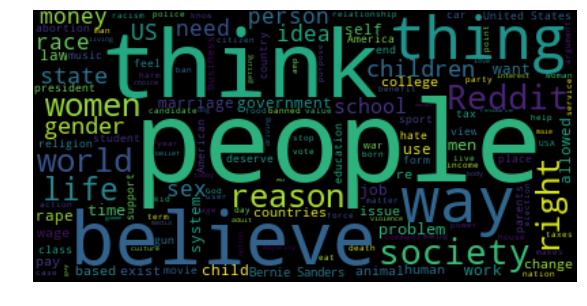

In [9]:
fig = plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [10]:
changed = 0

for topic in topics:
    if topic['delta_label']:
        changed += 1
        
stayed = len(topics) - changed

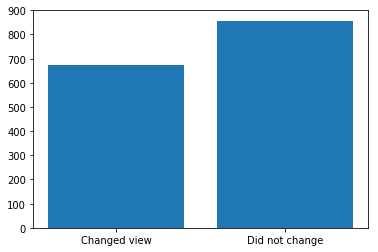

In [11]:
x = [1, 2]
plt.bar(x, [changed, stayed])
plt.xticks(x, ('Changed view', 'Did not change'))
plt.show()

In [12]:
from word_embeddings import GloVe
model = GloVe('../data/glove.6B.zip')

In [13]:
def loadingBar(count,total,size):
    percent = float(count)/float(total)*100
    sys.stdout.write("\r" + str(int(count)).rjust(3,'0')+"/"+str(int(total)).rjust(3,'0') 
                     + ' [' + '='*int(percent/10)*size + ' '*(10-int(percent/10))*size + ']')

In [14]:
avg_topics = []
useful = {'VERB', 'NOUN', 'PROPN'}

"""
for i, topic in enumerate(topics):
    text = topic['selftext']
    doc = nlp(text)
    avg = ()
    for token in doc:
        if not token.is_stop and token.pos_ in useful:
            avg += (model.vectorize(token.text), )
    avg = np.mean(np.vstack(avg), axis=0)
    avg_topics.append(avg)
    loadingBar(i, len(topics), 5)
""";

In [27]:
with open('../data/sample.json', 'r') as f:
    posts = json.load(f)

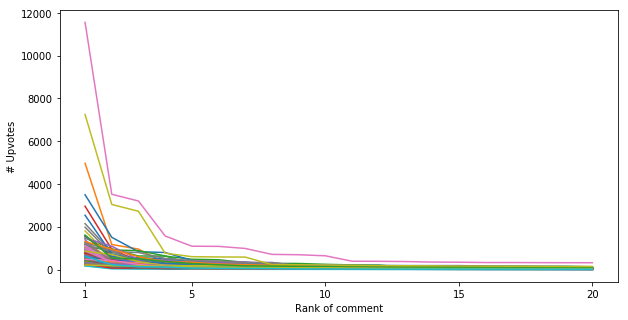

In [28]:
fig = plt.figure(figsize=(10, 5))
for post in posts:
    plt.plot(np.arange(1, 21), [comment['score'] for comment in post['comments']])
    plt.xticks([1, 5, 10, 15, 20])
    plt.xlabel('Rank of comment')
    plt.ylabel('# Upvotes')
plt.show()

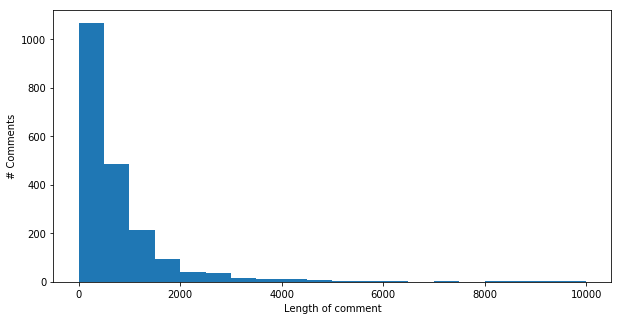

In [139]:
lengths = []
for post in posts:
    lengths += [len(c['text']) for c in post['comments']]
    
fig = plt.figure(figsize=(10, 5))
plt.hist(lengths, bins=20)
plt.xlabel('Length of comment')
plt.ylabel('# Comments')
plt.show()

In [142]:
short = []
long = []
all_caps = []

for post in posts:
    for comment in post['comments']:
        if len(comment['text'])  < 20:
            short.append(comment)
        if len(comment['text']) > 8000:
            long.append(comment)
        if comment['text'].isupper():
            all_caps.append(comment)

In [146]:
all_caps[:5]

[{'score': 1178,
  'text': 'FIRE GOOD  FIRE WARM NO NEED SKIN FOR WARM  USE FIRE SEE IN CAVE   FIRE BURN MEAT  ME EAT MEAT  BURN MEAT  EAT GOOD  FIRE SCARE ANIMAL  FIRE SCARE TIGER  FIRE SCARE MAMMOTH  FIRE SCARE SLOTH  FIRE SCARE BAD MAN  SPEAR KILL ONE BAD MAN  FIRE KILL LOT BAD MAN  FIRE COME FROM ANCESTOR   ANCESTOR LOVE US  FIRE GOOD      '},
 {'score': 388,
  'text': "> FIRE WARM NO NEED SKIN FOR WARM  CAN'T MOVE AROUND USING ONLY FIRE AND BE WARM. NEED SKIN AND FUR. CAN'T WARE FUR WHILE USING FIRE STICK BECAUSE IT CATCH FIRE.  > BURN MEAT TASTE ODD. MOTHER NEVER GIVE ME BURN MEAT. ALWAYS EAT RAW. ME LIKE RAW.  >FIRE SCARE ANIMAL >FIRE SCARE TIGER >FIRE SCARE MAMMOTH >FIRE SCARE SLOTH  GOOD POINT BUT ME LIVE IN TRIBE. TRIBE PEOPLE KEEP WATCH IN NIGHT WITH WOLVES. SAFETY IN NUMBERS. NOT FEEL FIRE GIVES ADDED ADVANTAGE.  >FIRE SCARE BAD MAN  BAD MAN SCARE YOU WITH FIRE  >SPEAR KILL ONE BAD MAN >FIRE KILL LOT BAD MAN  ONE BAD OR STUPID MAN KILL LOT GOOD MEN WITH FIRE. NOT MUCH CONTR

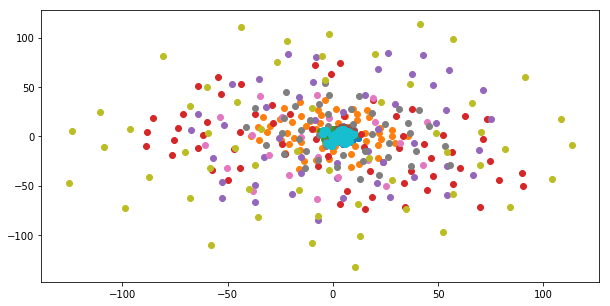

In [109]:
import random
from sklearn.manifold import TSNE

random.shuffle(topics)
useful = {'VERB', 'NOUN', 'PROPN'}
embeddings = []

for topic in topics[:10]:
    vectors = ()
    doc = nlp(topic['selftext'])
    for token in doc:
        if not token.is_stop and token.pos_ == 'NOUN':
            # print(token.text)
            vectors += (model.vectorize(token.text), )
    embeds = TSNE(n_components=2).fit_transform(np.vstack(vectors))
    embeddings.append(embeds)
    
fig = plt.figure(figsize=(10, 5))
for embeds in embeddings:
    plt.scatter(embeds[:, 0], embeds[:, 1])
plt.show()